In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import matplotlib.image as mpimg
from scipy.interpolate import griddata
from scipy.optimize import minimize

#get training image for example
imgsource1 = nib.load(r'F:\lecture document\ECE 4250 signal\project\Training\IBSR_02\images\analyze\IBSR_02_ana.img')
img1=imgsource1.get_data()
img1=img1[:,:,64,0]  #middle coronal slice
print(img1.shape)
print(imgsource1.header['pixdim'])

imgsource2 = nib.load(r'F:\lecture document\ECE 4250 signal\project\Training\IBSR_02\segmentation\analyze\IBSR_02_seg_ana.img')
img2=imgsource2.get_data()
img2=img2[:,:,64,0]
print(img2.shape)
print(imgsource2.header['pixdim'])



print('pixel sapacing 0.9375, 0.9375, slicing thickness 1.5 for training cases')

fig = plt.figure()
plt.imshow(img1)  
fig = plt.figure()
plt.imshow(img2) 
plt.show()

mpimg.imsave(r'F:\lecture document\ECE 4250 signal\project\training_fig\IBSR_02_ana.png',img1)
mpimg.imsave(r'F:\lecture document\ECE 4250 signal\project\training_fig\IBSR_02_seg_ana.png',img2)

(256, 256)
[0.     0.9375 0.9375 1.5    0.     0.     0.     0.    ]
(256, 256)
[0.     0.9375 0.9375 1.5    0.     0.     0.     0.    ]
pixel sapacing 0.9375, 0.9375, slicing thickness 1.5 for training cases


C:\Users\zzj\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  # This is added back by InteractiveShellApp.init_path()
C:\Users\zzj\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

C:\Users\zzj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zzj\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


(256, 256)
[0.        0.8370536 0.8370536 1.5       0.        0.        0.
 0.       ]
(256, 256)
[0.        0.8370536 0.8370536 1.5       0.        0.        0.
 0.       ]


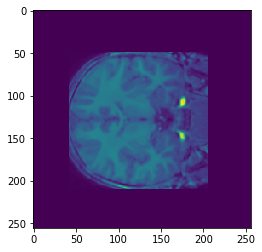

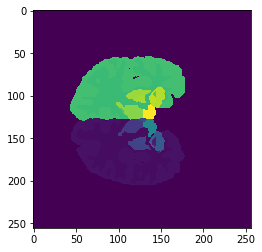

In [5]:
#get validation image for example
imgsource3 = nib.load(r'F:\lecture document\ECE 4250 signal\project\Validation\IBSR_15\images\analyze\IBSR_15_ana.img')
img3=imgsource3.get_data()
img3=img3[:,:,64,0]  #middle coronal slice
print(img3.shape)
print(imgsource3.header['pixdim'])
imgsource4 = nib.load(r'F:\lecture document\ECE 4250 signal\project\Validation\IBSR_15\segmentation\analyze\IBSR_15_seg_ana.img')
img4=imgsource4.get_data()
img4=img4[:,:,64,0]
print(img4.shape)
print(imgsource4.header['pixdim'])
print('pixel sapacing 0.8370536, 0.8370536, slicing thickness 1.5 for validation case 15')


fig = plt.figure()
plt.imshow(img3)  
fig = plt.figure()
plt.imshow(img4) 
plt.show()

mpimg.imsave(r'F:\lecture document\ECE 4250 signal\project\validation_fig\IBSR_15_ana.png',img3)
mpimg.imsave(r'F:\lecture document\ECE 4250 signal\project\validation_fig\IBSR_15_seg_ana.png',img4)

In [2]:
print(img2[128,:])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3 42 42  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  2  2  2  2  2  2 41 41 41 41 41 41 24 24 24 24 24 24 10 10 10
 10 10 10 49 49 49 49 49 14 14 14 14 14 60 28 28 28 28 28 28  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
